# Location Entropy

This notebook is compiled in response to a task received from Eureka. The actual response to the task, <b>Location Entropy</b>, can be found towards the end of this notebook, starting at <b>In [114]</b>. A number of additional tasks preceed this. These are included to both preprocess the data but to also give an indication of some of my proficiencies, and limitations, in python. 

---

Import libaries and packages needed to response to the assignment.

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline





Create a new folder in the current directory to store data files downloaded during the execution of this notebook.

In [2]:
current_directory = os.getcwd()
downloaded_data = os.path.join(current_directory, r'DownloadedData')
if not os.path.exists(downloaded_data):
   os.makedirs(downloaded_data)



Create an object of the build_opener class from the request libary. This will be used to automate the downloading of file. Headers added to mask the requests to the individual websites.

In [3]:
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

---

## Preprocessing Vehicle Data

Four different datasets will be used to respond to this assignment. The first of these contains information on the number of cars registered in each country. The following code segment obtains the required file from the associated URL and stores it locally in the previously created directory.

In [4]:
url_cars = 'http://apps.who.int/gho/athena/data/GHO/RS_194?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR;DATASOURCE&x-topaxis=GHO&profile=crosstable&format=csv'
local_cars = 'DownloadedData/vehicles.csv'
urllib.request.urlretrieve(url_cars,local_cars)


('DownloadedData/vehicles.csv', <http.client.HTTPMessage at 0x1a1f2c1a58>)

The file is next read into a pandas dataframe.

In [5]:
df_cars = pd.read_csv('DownloadedData/vehicles.csv')

In [6]:
df_cars.describe()

Country   Year Data Source  \
count                          179    179         179   
unique                         179      9         173   
top     Iran (Islamic Republic of)   2013               
freq                             1    133           7   

       Number of registered vehicles  
count                            179  
unique                           173  
top                                -  
freq                               7

An assumption is made at this point. From the segment above, 2013 is the most frequently occuring value in the Year column. From this point it is assumed that the numbers of cars registered in each country does not vary significantly from year to year. Therefore, it is assumed from this point that all data in this dataframe refers to the year 2013.

Unnecessary data columns are now removed from the dataframe

In [7]:
df_cars.drop(['Year', 'Data Source'], axis = 1, inplace=True)

In [8]:
df_cars.head()

Country Number of registered vehicles
0  Afghanistan                       655 357
1      Albania                       445 956
2      Algeria                     7 308 539
3      Andorra                        76 394
4       Angola                       581 530

---

## Preprocessing Accident Data

The second dataset which will be used in this assignment contains information on the number of deaths occuring from traffic accidents in each country for the year 2013.

In [9]:
url_accidents = 'http://apps.who.int/gho/athena/data/GHO/RS_196,RS_198?filter=COUNTRY:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR&profile=crosstable&format=csv'
local_accidents = 'DownloadedData/accidents.csv'
urllib.request.urlretrieve(url_accidents,local_accidents)

('DownloadedData/accidents.csv', <http.client.HTTPMessage at 0x1a1f31f0b8>)

In [10]:
df_accidents = pd.read_csv('DownloadedData/accidents.csv', header=1)

In [11]:
df_accidents.head()

Country                    2013   2013.1
0  Afghanistan   4 734 [4 006 - 5 461]     15.5
1      Albania         478 [435 - 521]     15.1
2      Algeria  9 337 [7 985 - 10 689]     23.8
3      Andorra                       6      7.6
4       Angola   5 769 [4 626 - 6 912]     26.9

Columns which will not be needed are again removed. Columns are then renamed to assist with future tasks.

In [12]:
df_accidents.drop([' 2013'], axis = 1, inplace=True)

In [13]:
df_accidents.columns = ['Country', 'DeathsPer100k']

In [14]:
df_accidents.head()

Country  DeathsPer100k
0  Afghanistan           15.5
1      Albania           15.1
2      Algeria           23.8
3      Andorra            7.6
4       Angola           26.9

---

## Preprocessing Country Location Data

The next dataset needed to respond to this assignment contains geospatial data for each country.  

In [15]:
url_countries = 'http://worldmap.harvard.edu/download/wfs/34645/csv?outputFormat=csv&service=WFS&request=GetFeature&format_options=charset%3AUTF-8&typename=geonode%3Acountry_centroids_az8&version=1.0.0'
local_countries = 'DownloadedData/countries.csv'
urllib.request.urlretrieve(url_countries,local_countries)

('DownloadedData/countries.csv', <http.client.HTTPMessage at 0x1a1f2c1dd8>)

In [16]:
df_countries = pd.read_csv('DownloadedData/countries.csv')

Next, the dataset is sliced to only include the columns of interest.

In [17]:
df_countries = df_countries[['sovereignt', 'region_un', 'Longitude', 'Latitude']]

From investigating the dataset, it appears that a number of countries have repeated enteries. These are perhaps related to states, foreign territories or sub-divisions of each country.

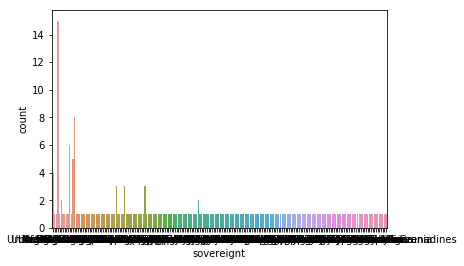

In [18]:
sns.countplot(df_countries['sovereignt'])

In [19]:
df_countries.groupby('sovereignt').count()

region_un  Longitude  Latitude
sovereignt                                                 
Afghanistan                          1          1         1
Albania                              1          1         1
Algeria                              1          1         1
Andorra                              1          1         1
Angola                               1          1         1
Antarctica                           1          1         1
Antigua and Barbuda                  1          1         1
Argentina                            1          1         1
Armenia                              1          1         1
Australia                            5          5         5
Austria                              1          1         1
Azerbaijan                           1          1         1
Bahrain                              1          1         1
Bangladesh                           1          1         1
Barbados                             1          1         1
Belarus                              1          1         1
Belgium                              1          1         1
Belize                               1          1         1
Benin                                1          1         1
Bhutan                               1          1         1
Bolivia                              1          1         1
Bosnia and Herzegovina               1          1         1
Botswana                             1          1         1
Brazil                               1          1         1
Brunei                               1          1         1
Bulgaria                             1          1         1
Burkina Faso                         1          1         1
Burundi                              1          1         1
Cambodia                             1          1         1
Cameroon                             1          1         1
...                                ...        ...       ...
Swaziland                            1          1         1
Sweden                               1          1         1
Switzerland                          1          1         1
Syria                                1          1         1
Taiwan                               1          1         1
Tajikistan                           1          1         1
Thailand                             1          1         1
The Bahamas                          1          1         1
Togo                                 1          1         1
Tonga                                1          1         1
Trinidad and Tobago                  1          1         1
Tunisia                              1          1         1
Turkey                               1          1         1
Turkmenistan                         1          1         1
Uganda                               1          1         1
Ukraine                              1          1         1
United Arab Emirates                 1          1         1
United Kingdom                      15         15        15
United Republic of Tanzania          1          1         1
United States of America             6          6         6
Uruguay                              1          1         1
Uzbekistan                           1          1         1
Vanuatu                              1          1         1
Vatican                              1          1         1
Venezuela                            1          1         1
Vietnam                              1          1         1
Western Sahara                       1          1         1
Yemen                                1          1         1
Zambia                               1          1         1
Zimbabwe                             1          1         1

[200 rows x 3 columns]

To address this, the dataframe will be grouped by each country and the mean values of the Longitude and	Latitude columns will be used to represent the final values for each country. Here, it is hoped that this will result in an approximate value of the coordinates of each country which will lie within the borders of the country.


In [20]:
df_countries_grouped = df_countries.groupby('sovereignt', as_index=False).mean()

In [21]:
df_countries.head()

sovereignt region_un  Longitude   Latitude
0     Netherlands  Americas -69.982677  12.520880
1     Afghanistan      Asia  66.004734  33.835231
2          Angola    Africa  17.537368 -12.293361
3  United Kingdom  Americas -63.064989  18.223959
4         Albania    Europe  20.049834  41.142450

In [22]:
df_countries.shape

(241, 4)

In [23]:
df_countries_grouped.head()

sovereignt  Longitude   Latitude
0  Afghanistan  66.004734  33.835231
1      Albania  20.049834  41.142450
2      Algeria   2.617323  28.158938
3      Andorra   1.560544  42.542291
4       Angola  17.537368 -12.293361

In [24]:
df_countries_grouped.shape

(200, 3)

It is clear that the Regions column has been lost during the groupby function. The following code attempts to find the correct region from the original dataframe and use it to update the new countries dataframe.

In [25]:
regions = []
for index in range(0, len(df_countries_grouped)):
    country = df_countries_grouped.iloc[index]['sovereignt']
    value = df_countries.loc[df_countries['sovereignt']==country][['region_un']]
    region = value.iloc[0][0]
    regions.append(region)
    

In [26]:
df_countries_grouped['Region'] = regions

In [27]:
df_countries_grouped.head()

sovereignt  Longitude   Latitude  Region
0  Afghanistan  66.004734  33.835231    Asia
1      Albania  20.049834  41.142450  Europe
2      Algeria   2.617323  28.158938  Africa
3      Andorra   1.560544  42.542291  Europe
4       Angola  17.537368 -12.293361  Africa

Finally, column names will be changed to more meaningful ones.

In [28]:
df_countries_grouped.columns = ['Country', 'Longitude', 'Latitude', 'Region']

In [29]:
df_countries_grouped.head()

Country  Longitude   Latitude  Region
0  Afghanistan  66.004734  33.835231    Asia
1      Albania  20.049834  41.142450  Europe
2      Algeria   2.617323  28.158938  Africa
3      Andorra   1.560544  42.542291  Europe
4       Angola  17.537368 -12.293361  Africa

---

## Preprocessing 2013 Population Data

The final dataset needed for this response contains the populations statistics for each country. Again, only the data for 2013 will be selected for future analytics.

In [30]:
url_population = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel'
local = 'DownloadedData/population.xls'
urllib.request.urlretrieve(url_population,local)

('DownloadedData/population.xls', <http.client.HTTPMessage at 0x1a1f398518>)

In [31]:
df_population = pd.read_excel('DownloadedData/population.xls', sheet_name=0, header=3)

In [32]:
df_population.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965     ...      \
0    55438.0    56225.0    56695.0    57032.0    57360.0     ...       
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0     ...       
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0     ...       
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0     ...       
4    14375.0    15370.0    16412.0    17469.0    18549.0     ...       

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016        2017  
0    103795.0    104341.0    104822.0    105264.0  
1  32758020.0  33736494.0  34656032.0  35530081.0  
2  26920466.0  27859305.0  28813463.0  29784193.0  
3   2889104.0   2880703.0   2876101.0   2873457.0  
4     79223.0     78014.0     77281.0     76965.0  

[5 rows x 62 columns]

In [33]:
df_population = df_population[['Country Name', '2013']]

In [34]:
df_population.columns = ['Country', '2013POP']

In [35]:
df_population.head()

Country     2013POP
0        Aruba    103187.0
1  Afghanistan  31731688.0
2       Angola  25998340.0
3      Albania   2895092.0
4      Andorra     80788.0

---


This now completes the collection of data needed to respond to this task. In the next section, these dataframe will be combined into a single collection which will be used for the remaining activities.

---

## Merge dataframes into a single data set

In three separate steps, the four dataframes will be combined into one. This will be done using a inner merge, starting with the population dataframe. This will result in a number of observations being omitted from the resulting dataframe. This may occur because of missing values, different spellings of country names and no matching value. 

In [36]:
df_merged = pd.merge(df_countries_grouped, df_population, how='inner', on = 'Country', validate="1:1")

In [37]:
df_merged.head()

Country  Longitude   Latitude  Region     2013POP
0  Afghanistan  66.004734  33.835231    Asia  31731688.0
1      Albania  20.049834  41.142450  Europe   2895092.0
2      Algeria   2.617323  28.158938  Africa  38338562.0
3      Andorra   1.560544  42.542291  Europe     80788.0
4       Angola  17.537368 -12.293361  Africa  25998340.0

In [38]:
df_merged.shape

(165, 5)

In [39]:
df_merged = pd.merge(df_merged, df_cars, how = 'inner', on = 'Country', validate="1:1")

In [40]:
df_merged.head()

Country  Longitude   Latitude  Region     2013POP  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0   
1      Albania  20.049834  41.142450  Europe   2895092.0   
2      Algeria   2.617323  28.158938  Africa  38338562.0   
3      Andorra   1.560544  42.542291  Europe     80788.0   
4       Angola  17.537368 -12.293361  Africa  25998340.0   

  Number of registered vehicles  
0                       655 357  
1                       445 956  
2                     7 308 539  
3                        76 394  
4                       581 530

In [41]:
df_merged.shape

(149, 6)

In [42]:
df_merged.columns = ['Country', 'Longitude', 'Latitude', 'Region', '2013POP', 'NumberCars']

In [43]:
df_merged = pd.merge(df_merged, df_accidents, how = 'inner', on = 'Country', validate="1:1")

In [44]:
df_merged.head()

Country  Longitude   Latitude  Region     2013POP NumberCars  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0    655 357   
1      Albania  20.049834  41.142450  Europe   2895092.0    445 956   
2      Algeria   2.617323  28.158938  Africa  38338562.0  7 308 539   
3      Andorra   1.560544  42.542291  Europe     80788.0     76 394   
4       Angola  17.537368 -12.293361  Africa  25998340.0    581 530   

   DeathsPer100k  
0           15.5  
1           15.1  
2           23.8  
3            7.6  
4           26.9

In [45]:
df_merged.shape

(149, 7)

In [46]:
df_merged.dropna(inplace=True)

In [47]:
df_merged.shape

(148, 7)

In [48]:
df_merged.head()

Country  Longitude   Latitude  Region     2013POP NumberCars  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0    655 357   
1      Albania  20.049834  41.142450  Europe   2895092.0    445 956   
2      Algeria   2.617323  28.158938  Africa  38338562.0  7 308 539   
3      Andorra   1.560544  42.542291  Europe     80788.0     76 394   
4       Angola  17.537368 -12.293361  Africa  25998340.0    581 530   

   DeathsPer100k  
0           15.5  
1           15.1  
2           23.8  
3            7.6  
4           26.9

---

At this point, all the required data needed for subsequent tasks is all contained within a single data collection. A number of data cleaning and feature engineering tasks need to be completed next. A copy of the dataframe will now also be made to prevent having to rerun the all the previous steps if errors are made.

In [49]:
df = df_merged.copy()

---

## Data Cleaning

In [50]:
df.describe()

Longitude    Latitude       2013POP  DeathsPer100k
count  148.000000  148.000000  1.480000e+02     148.000000
mean    16.082821   18.558731  3.998529e+07      16.098649
std     63.863023   24.594330  1.553280e+08       8.968820
min   -174.809873  -37.730710  2.092000e+04       0.000000
25%    -10.496015    3.774579  2.300008e+06       7.775000
50%     18.941882   17.311658  8.446644e+06      15.650000
75%     46.915052   39.235533  2.608532e+07      24.125000
max    170.339761   68.750156  1.357380e+09      36.200000

The code above suggests that the NumberCars column is not an integer type. Inspecting the values of the column highlights that there are some missing enteries, marked by '-', and that all other values are strings.

In [51]:
df['NumberCars'].values

array(['655 357', '445 956', '7 308 539', '76 394', '581 530', '29 989',
       '23 120 241', '-', '17 180 596', '6 384 971', '1 135 936',
       '545 155', '2 088 566', '112 118', '3 900 442', '6 993 767', '-',
       '34 914', '68 173', '881 200', '520 793', '81 600 729',
       '3 502 771', '1 545 903', '2 457 569', '-', '22 366 270', '37 475',
       '622 120', '4 263 084', '250 138 212', '9 734 565', '1 759 341',
       '1 869 370', '628 155', '644 068', '2 911 147', '-', '24 620',
       '3 215 773', '1 721 206', '817 972', '763 975', '478 244',
       '86 535', '5 862 216', '42 792 103', '195 000', '951 649',
       '52 391 000', '1 532 080', '8 035 423', '2 562 925', '33 943',
       '15 694', '1 378 050', '3 690 599', '245 949', '159 490 578',
       '104 211 132', '4 515 041', '2 482 557', '2 850 513', '51 269 218',
       '518 239', '91 377 312', '1 263 754', '3 926 487', '2 011 972',
       '3 452', '1 841 416', '826 469', '1 680 011', '122 997',
       '1 085 075', '3 553 

In [52]:
df[df['NumberCars'] == '-']

Country  Longitude   Latitude    Region     2013POP  \
7                  Armenia  44.929933  40.289526      Asia   2893509.0   
16                  Belize -88.710105  17.200275  Americas    344181.0   
25                Cameroon  12.739642   5.691098    Africa  21655715.0   
37                Djibouti  42.560675  11.748718    Africa    896688.0   
118  Sao Tome and Principe   6.724297   0.443914    Africa    187045.0   
138    Trinidad and Tobago -61.265679  10.457334  Americas   1348248.0   
145             Uzbekistan  63.140015  41.755542      Asia  30243200.0   

    NumberCars  DeathsPer100k  
7            -           18.3  
16           -           24.4  
25           -           27.6  
37           -           24.7  
118          -           31.1  
138          -           14.1  
145          -           11.2

Seven countries have no recorded value for the numbers of cars registered. Averages and estimates could be used to replace these missing values but for the purposes of this assignment, these observations will now be removed from the dataframe.

In [53]:
df = df[df['NumberCars'] != '-']

In [54]:
df.reset_index(drop=True, inplace = True)

In [55]:
df_merged.head()

Country  Longitude   Latitude  Region     2013POP NumberCars  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0    655 357   
1      Albania  20.049834  41.142450  Europe   2895092.0    445 956   
2      Algeria   2.617323  28.158938  Africa  38338562.0  7 308 539   
3      Andorra   1.560544  42.542291  Europe     80788.0     76 394   
4       Angola  17.537368 -12.293361  Africa  25998340.0    581 530   

   DeathsPer100k  
0           15.5  
1           15.1  
2           23.8  
3            7.6  
4           26.9

The next code segments creates a list from the string values in the NumberCars column. The List will then be appended to the dataframe.

In [56]:
totalCars = []

for index in range(0, len(df)):
    values = df.iloc[index]['NumberCars'].split(" ")
    new = ""
    for value in values:
        new = new + value
    totalCars.append(int(new))



In [57]:
len(totalCars)

141

In [58]:
totalCars

[655357,
 445956,
 7308539,
 76394,
 581530,
 29989,
 23120241,
 17180596,
 6384971,
 1135936,
 545155,
 2088566,
 112118,
 3900442,
 6993767,
 34914,
 68173,
 881200,
 520793,
 81600729,
 3502771,
 1545903,
 2457569,
 22366270,
 37475,
 622120,
 4263084,
 250138212,
 9734565,
 1759341,
 1869370,
 628155,
 644068,
 2911147,
 24620,
 3215773,
 1721206,
 817972,
 763975,
 478244,
 86535,
 5862216,
 42792103,
 195000,
 951649,
 52391000,
 1532080,
 8035423,
 2562925,
 33943,
 15694,
 1378050,
 3690599,
 245949,
 159490578,
 104211132,
 4515041,
 2482557,
 2850513,
 51269218,
 518239,
 91377312,
 1263754,
 3926487,
 2011972,
 3452,
 1841416,
 826469,
 1680011,
 122997,
 1085075,
 3553497,
 1984496,
 431245,
 219576,
 437416,
 23819256,
 61412,
 289828,
 322960,
 2116,
 416190,
 443495,
 35005913,
 41055,
 675064,
 201229,
 3286421,
 542336,
 4310112,
 280583,
 1178911,
 9612273,
 3250066,
 566731,
 315600,
 5791446,
 3671885,
 1082996,
 9080437,
 7102,
 1004669,
 94297,
 1227469,
 4264114,

In [59]:
df['TotalCars'] = totalCars

In [60]:
df.head()

Country  Longitude   Latitude  Region     2013POP NumberCars  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0    655 357   
1      Albania  20.049834  41.142450  Europe   2895092.0    445 956   
2      Algeria   2.617323  28.158938  Africa  38338562.0  7 308 539   
3      Andorra   1.560544  42.542291  Europe     80788.0     76 394   
4       Angola  17.537368 -12.293361  Africa  25998340.0    581 530   

   DeathsPer100k  TotalCars  
0           15.5     655357  
1           15.1     445956  
2           23.8    7308539  
3            7.6      76394  
4           26.9     581530

The NumberCars column is no longer needed so it will now be dropped from the dataframe.

In [61]:
df.drop(['NumberCars'], axis = 1, inplace=True)

In [62]:
df.head()

Country  Longitude   Latitude  Region     2013POP  DeathsPer100k  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0           15.5   
1      Albania  20.049834  41.142450  Europe   2895092.0           15.1   
2      Algeria   2.617323  28.158938  Africa  38338562.0           23.8   
3      Andorra   1.560544  42.542291  Europe     80788.0            7.6   
4       Angola  17.537368 -12.293361  Africa  25998340.0           26.9   

   TotalCars  
0     655357  
1     445956  
2    7308539  
3      76394  
4     581530

In [63]:
df.describe()

Longitude    Latitude       2013POP  DeathsPer100k     TotalCars
count  141.000000  141.000000  1.410000e+02     141.000000  1.410000e+02
mean    16.738572   18.575218  4.156209e+07      15.824113  9.258457e+06
std     64.290970   24.971352  1.589768e+08       8.976540  2.883272e+07
min   -174.809873  -37.730710  2.092000e+04       0.000000  2.116000e+03
25%    -10.347798    3.728709  2.869107e+06       7.600000  3.209740e+05
50%     19.238839   17.419125  8.657785e+06      15.300000  1.178911e+06
75%     47.545999   39.115541  2.634625e+07      23.900000  4.310112e+06
max    170.339761   68.750156  1.357380e+09      36.200000  2.501382e+08

For future grouping by Regions, the Region column will now be converted to a categorial data type.

In [64]:
df['Region'] = df['Region'].astype('category')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 7 columns):
Country          141 non-null object
Longitude        141 non-null float64
Latitude         141 non-null float64
Region           141 non-null category
2013POP          141 non-null float64
DeathsPer100k    141 non-null float64
TotalCars        141 non-null int64
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 7.0+ KB


---

## Feature Engineering

A number of additional feature will now be created from the current dataset. These tasks are being taken to ensure that further activities can be processed in a more meaningful manner.

<b>1 - Generate Cars Per 100K of Population</b>

Given that the traffic deaths statistics are in 100k of population, a new feature will be added to the dataframe to reflect the number of cars per 100k of population, to maintain the same scale in both feature.

In [66]:
carsPer100K = []

for index in range(0, len(df)):
    value = float(df.iloc[index]['TotalCars']) / (float(df.iloc[index]['2013POP']))*100000
    carsPer100K.append(value)
    

In [67]:
df['CarsPer100k'] = carsPer100K

In [68]:
df.head()

Country  Longitude   Latitude  Region     2013POP  DeathsPer100k  \
0  Afghanistan  66.004734  33.835231    Asia  31731688.0           15.5   
1      Albania  20.049834  41.142450  Europe   2895092.0           15.1   
2      Algeria   2.617323  28.158938  Africa  38338562.0           23.8   
3      Andorra   1.560544  42.542291  Europe     80788.0            7.6   
4       Angola  17.537368 -12.293361  Africa  25998340.0           26.9   

   TotalCars   CarsPer100k  
0     655357   2065.307714  
1     445956  15403.862813  
2    7308539  19063.153699  
3      76394  94561.073427  
4     581530   2236.796657

---

<b>2 - Create a categorical data feature to represent Deaths from traffic accidents per 100K</b>

To enable more meaningful probabilities and later entropy values to be calculated from the data set, five categories will be developed from the existing DeathsPer100K feature. This categories will be 'very low', 'low', 'median', 'high' and 'very high'.

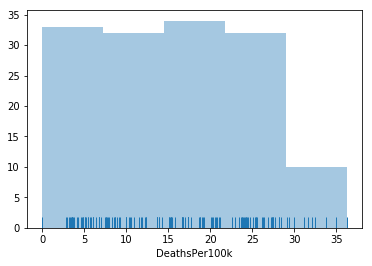

In [69]:
sns.distplot(df['DeathsPer100k'], kde=False, rug=True, bins = 5)

In [70]:
df['DeathsPer100k'].describe()

count    141.000000
mean      15.824113
std        8.976540
min        0.000000
25%        7.600000
50%       15.300000
75%       23.900000
max       36.200000
Name: DeathsPer100k, dtype: float64

The minimum value of 0 will cause problems in later analytics when calculating log2. It will therefore have to be removed from the dataframe.

In [71]:
df[df['DeathsPer100k']==0]

Country  Longitude   Latitude  Region  2013POP  DeathsPer100k  TotalCars  \
84  Monaco   7.406277  43.752746  Europe  37971.0            0.0      41055   

      CarsPer100k  
84  108121.987833

In [72]:
df[df['Country'] == 'Monaco']

Country  Longitude   Latitude  Region  2013POP  DeathsPer100k  TotalCars  \
84  Monaco   7.406277  43.752746  Europe  37971.0            0.0      41055   

      CarsPer100k  
84  108121.987833

In [73]:
df = df[df['Country'] != 'Monaco']

In [74]:
df.reset_index(drop=True, inplace = True)

In [75]:
df['DeathsPer100k'].max()

36.2

The range of values of the DeathsPer100K feature is [0, 36.2]. Using these value, a range of intervals will now be calculated before assigning each country a category based on the number of deaths resulting from traffic accidents in the country. The number of categories chosen here is 5, as the distribution across four of these are fairly similar. This can easily be changed to a lower or higher number of groups in the following segment.

In [76]:
number_of_categories = 5
interval_size = df['DeathsPer100k'].max() / number_of_categories

# all categories will be assumed to be 'Very High' until proven different in the code below, therefore only
# four interval bounds are required. Each bound will represent the upper limit.
categoryIntervals = [(interval_size * i) for i in range(1,5)] 
accidentCategories = []

for index in range(0, len(df)):
    value = df.iloc[index]['DeathsPer100k']
    category = "Very High"
    
    if value < categoryIntervals[0]:
        category = "Very Low"
    
    elif value < categoryIntervals[1]:
        category = "Low"
    
    elif value < categoryIntervals[2]:
        category = "Median"
    
    elif value < categoryIntervals[3]:
        category = "High"
    
    accidentCategories.append(category)


These new categories will now be appended to the dataframe. A dictionary of category values will also be created to assist with future visualisation of results and grouping.

In [77]:
df['AccidentCat'] = accidentCategories
df['AccidentCat'] = df['AccidentCat'].astype('category')

In [78]:
df.head(10)

Country   Longitude   Latitude    Region     2013POP  \
0          Afghanistan   66.004734  33.835231      Asia  31731688.0   
1              Albania   20.049834  41.142450    Europe   2895092.0   
2              Algeria    2.617323  28.158938    Africa  38338562.0   
3              Andorra    1.560544  42.542291    Europe     80788.0   
4               Angola   17.537368 -12.293361    Africa  25998340.0   
5  Antigua and Barbuda  -61.794693  17.277500  Americas     97824.0   
6            Argentina  -65.179807 -35.381349  Americas  42539925.0   
7            Australia  120.879294 -26.189876   Oceania  23145901.0   
8              Austria   14.126476  47.585494    Europe   8479823.0   
9           Azerbaijan   47.545999  40.288272      Asia   9416801.0   

   DeathsPer100k  TotalCars   CarsPer100k AccidentCat  
0           15.5     655357   2065.307714      Median  
1           15.1     445956  15403.862813      Median  
2           23.8    7308539  19063.153699        High  
3            7.6      76394  94561.073427         Low  
4           26.9     581530   2236.796657        High  
5            6.7      29989  30656.076219    Very Low  
6           13.6   23120241  54349.510489         Low  
7            5.4   17180596  74227.380477    Very Low  
8            5.4    6384971  75296.040967    Very Low  
9           10.0    1135936  12062.865085         Low

In [79]:
accidentCat_dict = {'Very Low': 0,
                    'Low' : 1,
                    'Median' : 2,
                    'High' : 3,
                    'Very High' : 4}

---

<b>3 - Create a categorical data feature to represent Deaths from traffic accidents per 100K</b>

Following a similar approach as above, a categorical feature will also be generated to represent the number of registered vahicles in each country. However, as seen in the next visual, the distribution of this feature is very different to that of traffic accidents. Upon inspecting the distribution, it appears that one country has approximately 170,000 cars registered for 100,000 people. This suggests that this value requires further investigation before proceeding as it may be an inaccurate value or outlier.

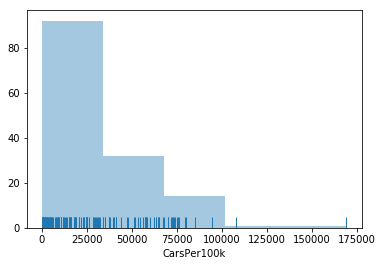

In [80]:
sns.distplot(df['CarsPer100k'], kde=False, rug=True, bins = 5)

In [81]:
df['CarsPer100k'].describe()

count       140.000000
mean      29780.847375
std       28220.835796
min         294.219752
25%        7345.768843
50%       21361.614893
75%       47798.382885
max      169043.122930
Name: CarsPer100k, dtype: float64

In [82]:
df['CarsPer100k'].max()

169043.12292975886

In [83]:
df[df['CarsPer100k'] == df['CarsPer100k'].max()]

Country  Longitude   Latitude  Region  2013POP  DeathsPer100k  \
111  San Marino  12.459223  43.941867  Europe  32303.0            3.2   

     TotalCars   CarsPer100k AccidentCat  
111      54606  169043.12293    Very Low

In actual fact, this is not an inaccurate value. A quick Google search suggests that San Marino has the highest number of registered cars per population globally. However, this value is significantly greater than all other values in the dataset and skews the distribution accordingly. Therefore, the decision made here will be to remove this observation from the dataframe, in order to limit the impact that it has on future analytics.

In [84]:
df[df['Country'] == "San Marino"]

Country  Longitude   Latitude  Region  2013POP  DeathsPer100k  \
111  San Marino  12.459223  43.941867  Europe  32303.0            3.2   

     TotalCars   CarsPer100k AccidentCat  
111      54606  169043.12293    Very Low

In [85]:
df = df[df['Country'] != "San Marino"]

In [86]:
df.reset_index(drop=True, inplace = True)

The distribution will now be reexamined.

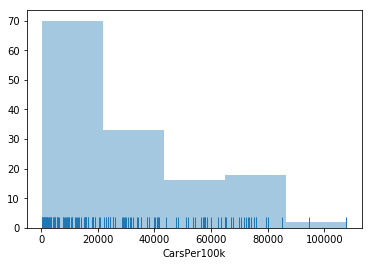

In [87]:
sns.distplot(df['CarsPer100k'], kde=False, rug=True, bins = 5)

Again, one value appears to be approximately 10,000 greater than the next value in the dataset.

In [88]:
df[df['CarsPer100k'] > 90000]

Country  Longitude   Latitude  Region    2013POP  DeathsPer100k  \
3   Andorra   1.560544  42.542291  Europe    80788.0            7.6   
41  Finland  23.113977  62.356866  Europe  5438972.0            4.8   

    TotalCars    CarsPer100k AccidentCat  
3       76394   94561.073427         Low  
41    5862216  107781.691099    Very Low

In actual fact, there are two values at the extreme of this distribution. This means that there are now three values in the upper category, as opposed to just one in the situation before the San Marino observation was removed. The decision here is maintain the dataset as it is. Five categories will again be developed from the distribution of this feature. The reason why five categories are chosen here is mainly due to keeping some level of consistency with the previously generarted feature for traffic accidents.

In [89]:
df['CarsPer100k'].describe()

count       139.000000
mean      28778.960500
std       25702.909412
min         294.219752
25%        6950.006468
50%       20685.054864
75%       45793.182862
max      107781.691099
Name: CarsPer100k, dtype: float64

In [90]:
number_of_categories = 5
interval_size = df['CarsPer100k'].max() / number_of_categories

# all categories will be assumed to be 'Very High' until proven different in the code below, therefore only
# four interval bounds are required. Each bound will represent the upper limit.
categoryIntervals = [(interval_size * i) for i in range(1,5)] 
carCategories = []

for index in range(0, len(df)):
    value = df.iloc[index]['CarsPer100k']
    category = "Very High"
    
    if value < categoryIntervals[0]:
        category = "Very Low"
    
    elif value < categoryIntervals[1]:
        category = "Low"
    
    elif value < categoryIntervals[2]:
        category = "Median"
    
    elif value < categoryIntervals[3]:
        category = "High"
    
    carCategories.append(category)



In [91]:
df['CarCat'] = carCategories
df['CarCat'] = df['CarCat'].astype('category')

In [92]:
df.head(10)

Country   Longitude   Latitude    Region     2013POP  \
0          Afghanistan   66.004734  33.835231      Asia  31731688.0   
1              Albania   20.049834  41.142450    Europe   2895092.0   
2              Algeria    2.617323  28.158938    Africa  38338562.0   
3              Andorra    1.560544  42.542291    Europe     80788.0   
4               Angola   17.537368 -12.293361    Africa  25998340.0   
5  Antigua and Barbuda  -61.794693  17.277500  Americas     97824.0   
6            Argentina  -65.179807 -35.381349  Americas  42539925.0   
7            Australia  120.879294 -26.189876   Oceania  23145901.0   
8              Austria   14.126476  47.585494    Europe   8479823.0   
9           Azerbaijan   47.545999  40.288272      Asia   9416801.0   

   DeathsPer100k  TotalCars   CarsPer100k AccidentCat     CarCat  
0           15.5     655357   2065.307714      Median   Very Low  
1           15.1     445956  15403.862813      Median   Very Low  
2           23.8    7308539  19063.153699        High   Very Low  
3            7.6      76394  94561.073427         Low  Very High  
4           26.9     581530   2236.796657        High   Very Low  
5            6.7      29989  30656.076219    Very Low        Low  
6           13.6   23120241  54349.510489         Low     Median  
7            5.4   17180596  74227.380477    Very Low       High  
8            5.4    6384971  75296.040967    Very Low       High  
9           10.0    1135936  12062.865085         Low   Very Low

In [93]:
# It is understood that this dictionary is identical to the previous created one for accidents and 
# is not really necessary. However, the decision to include it here is to help with readability in future segments.

carCat_dict = {'Very Low': 0,
                'Low' : 1,
                'Median' : 2,
                'High' : 3,
                'Very High' : 4}

This now completes all data preprocessing activities for the given dataset. However, given that each country's traffic accident and registered vehicles are now assigned categorical data values, an additional dataframe containing the associated probabilities can now also be generated. 

---

## Probability Matrix

<b>Calculating CarCat Probabilities</b>

In [94]:
df.shape[0]

139

In [95]:
df.groupby('CarCat').count()[:]['Country']

CarCat
High         18
Low          33
Median       16
Very High     2
Very Low     70
Name: Country, dtype: int64

In [96]:
carCatProb = []

for key in carCat_dict:
    grouped_df = df.groupby('CarCat').count()   
    num = grouped_df.loc[key]['Country'] # extracts count of countries for each category
    probability = num / df.shape[0] # calculates probability by dividing by total number of observations
    carCatProb.append(probability) 

In [97]:
carCatProb

[0.5035971223021583,
 0.23741007194244604,
 0.11510791366906475,
 0.12949640287769784,
 0.014388489208633094]

<b>Calculating AccidentCat probabilities</b>

In [98]:
df.groupby('AccidentCat').count()[:]['Country']

AccidentCat
High         32
Low          32
Median       34
Very High    10
Very Low     31
Name: Country, dtype: int64

In [99]:
accidentCatProb = []

for key in accidentCat_dict:
    grouped_df = df.groupby('AccidentCat').count()   
    num = grouped_df.loc[key]['Country'] # extracts count of countries for each category
    probability = num / df.shape[0] # calculates probability by dividing by total number of observations
    accidentCatProb.append(probability) 

In [100]:
accidentCatProb

[0.22302158273381295,
 0.2302158273381295,
 0.2446043165467626,
 0.2302158273381295,
 0.07194244604316546]

<b>Creating Probability Matrix</b>

In [101]:
df_prob = pd.DataFrame({'Prob_Acc' : accidentCatProb, 'Prob_Car' : carCatProb}, index = [key for key in accidentCat_dict])

In [102]:
df_prob

Prob_Acc  Prob_Car
Very Low   0.223022  0.503597
Low        0.230216  0.237410
Median     0.244604  0.115108
High       0.230216  0.129496
Very High  0.071942  0.014388

This dafaframe now contains the summed probabilities for each categorical feature.

---

# Visualising Countries and Categories

To assist with visualising the various groups of categories produced above, the following code segements initially plot all centroids of the countries which are still present in the dataframe, before plotting the various categories of feature which have just been generated.

A number of warnings are generated from the following code segments, all related to DeprecationWarning in Matplotlib. To assist with readability, these warnings will now be turned off in the following code segment.

In [103]:
import warnings
warnings.simplefilter(action='ignore')

### Plot Map


Initially, a plot of all countries will be generated using Basemap.

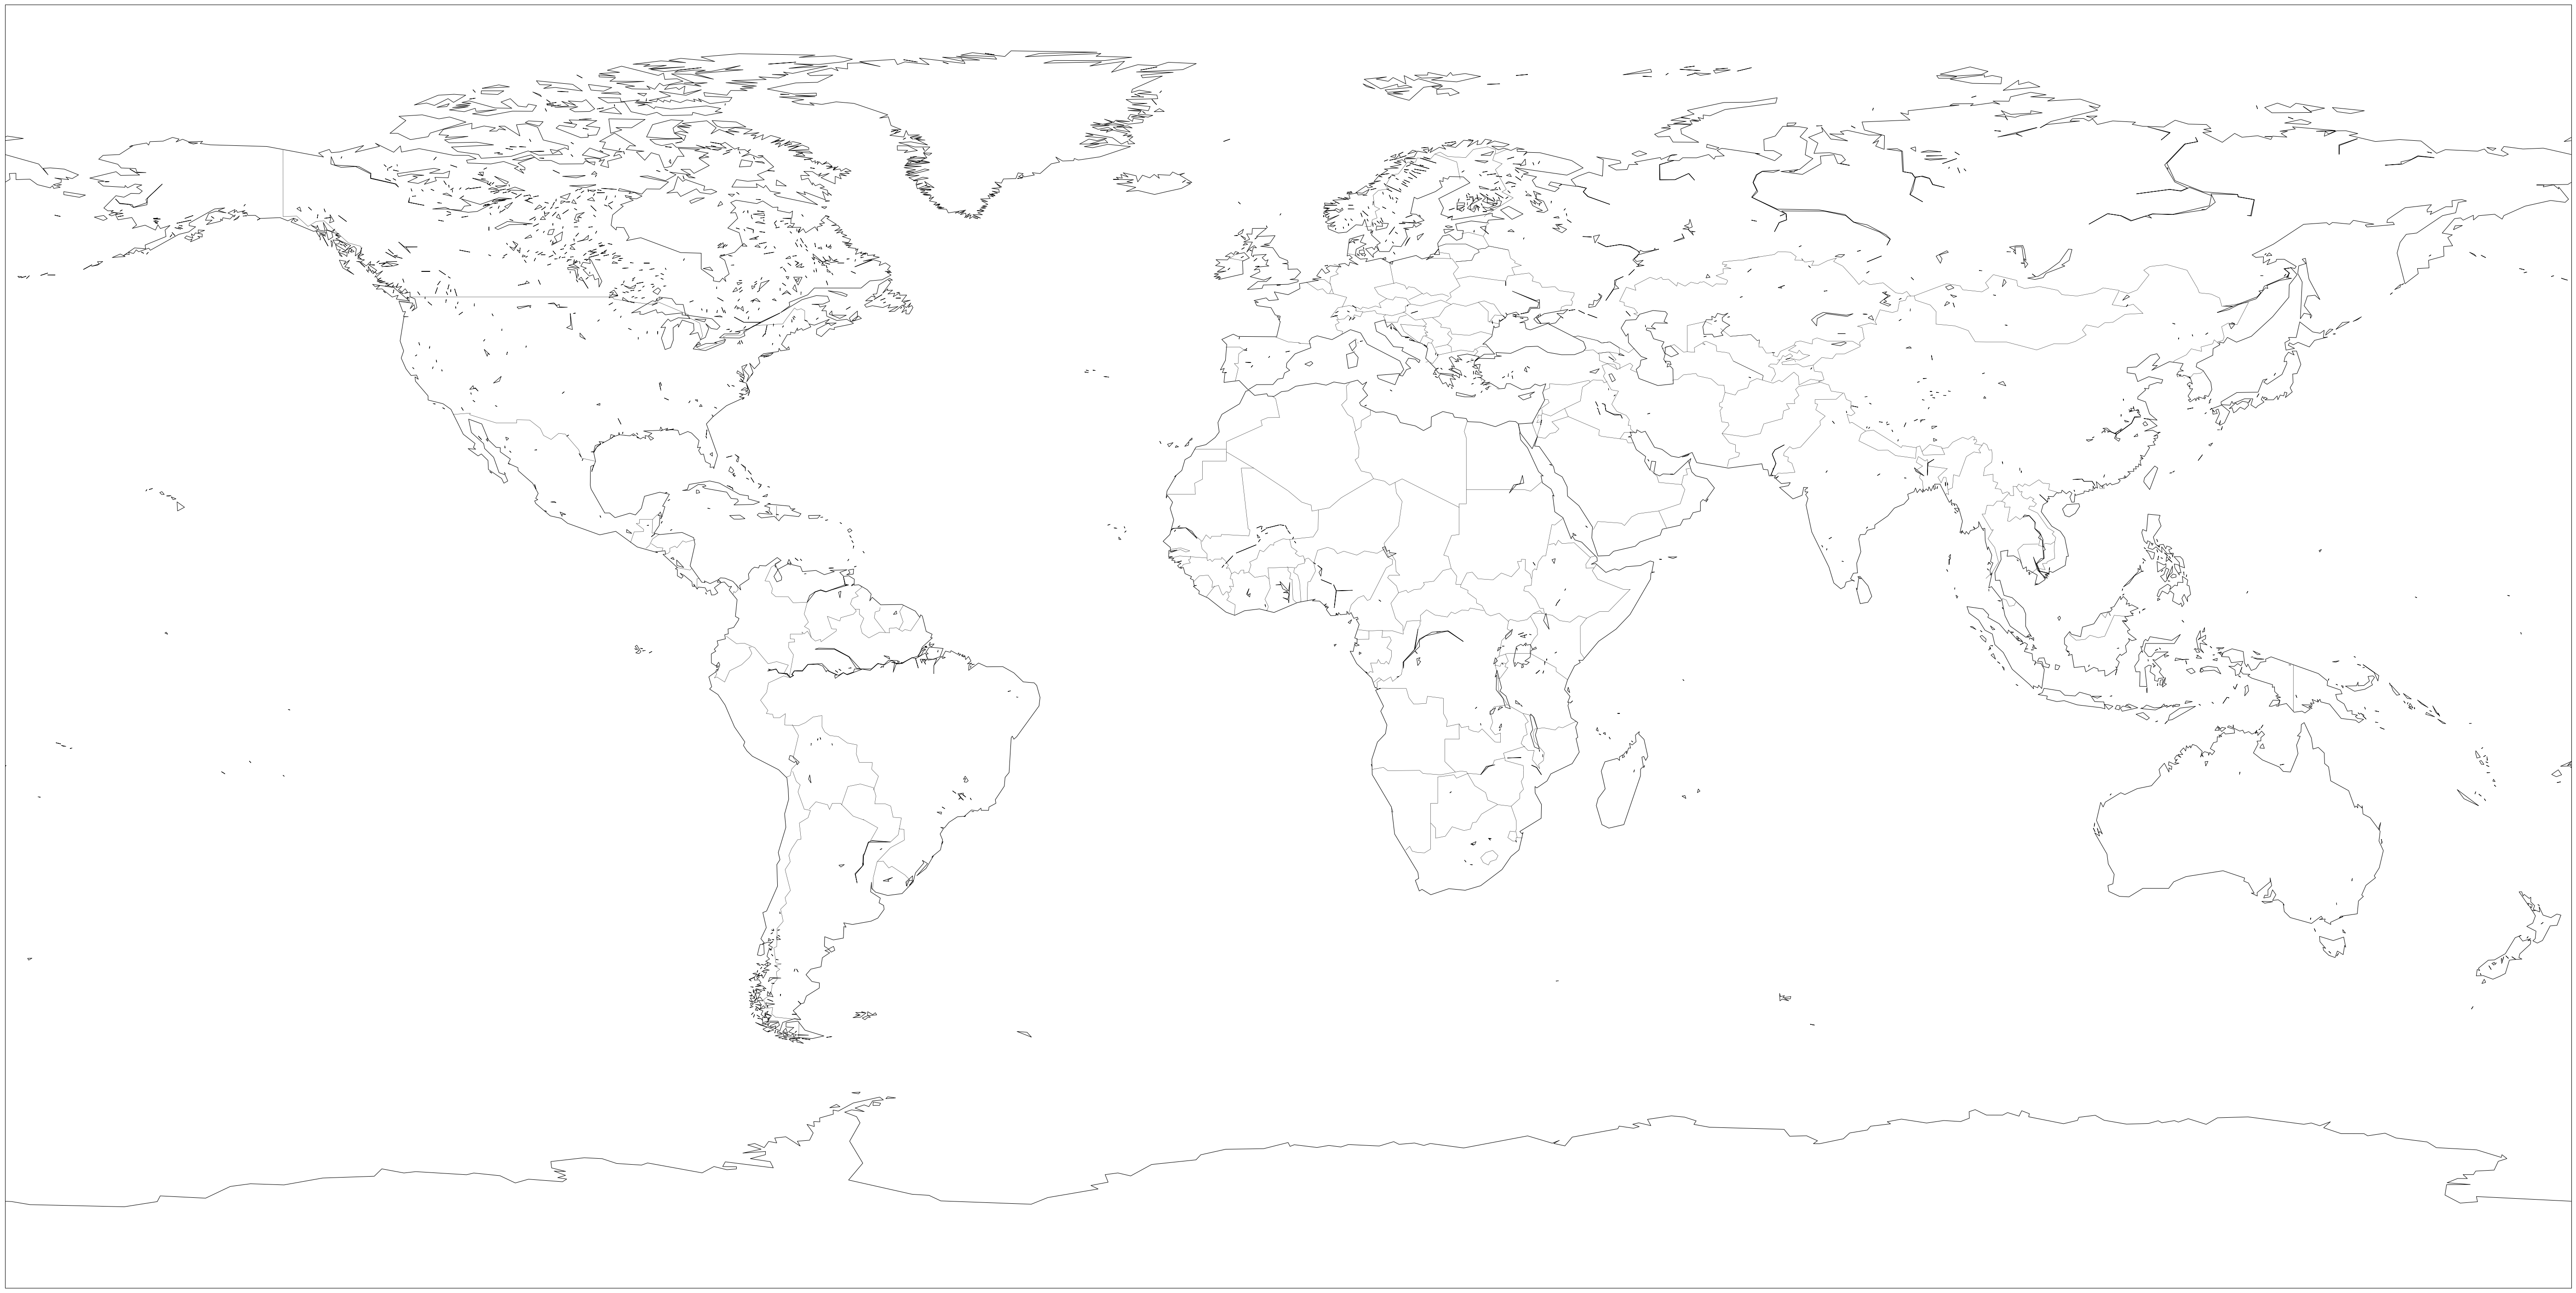

In [104]:
plt.figure(figsize=(100,100))
map = Basemap(projection = 'cyl', lat_0 = 0.0, lon_0 = 0.0,
    resolution = 'c', area_thresh = 1)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'white')
map.drawmapboundary()

### Plot Country Centroids

Using the Longitude and Latitude values in the dataframe, central points will now be plotted for each country.

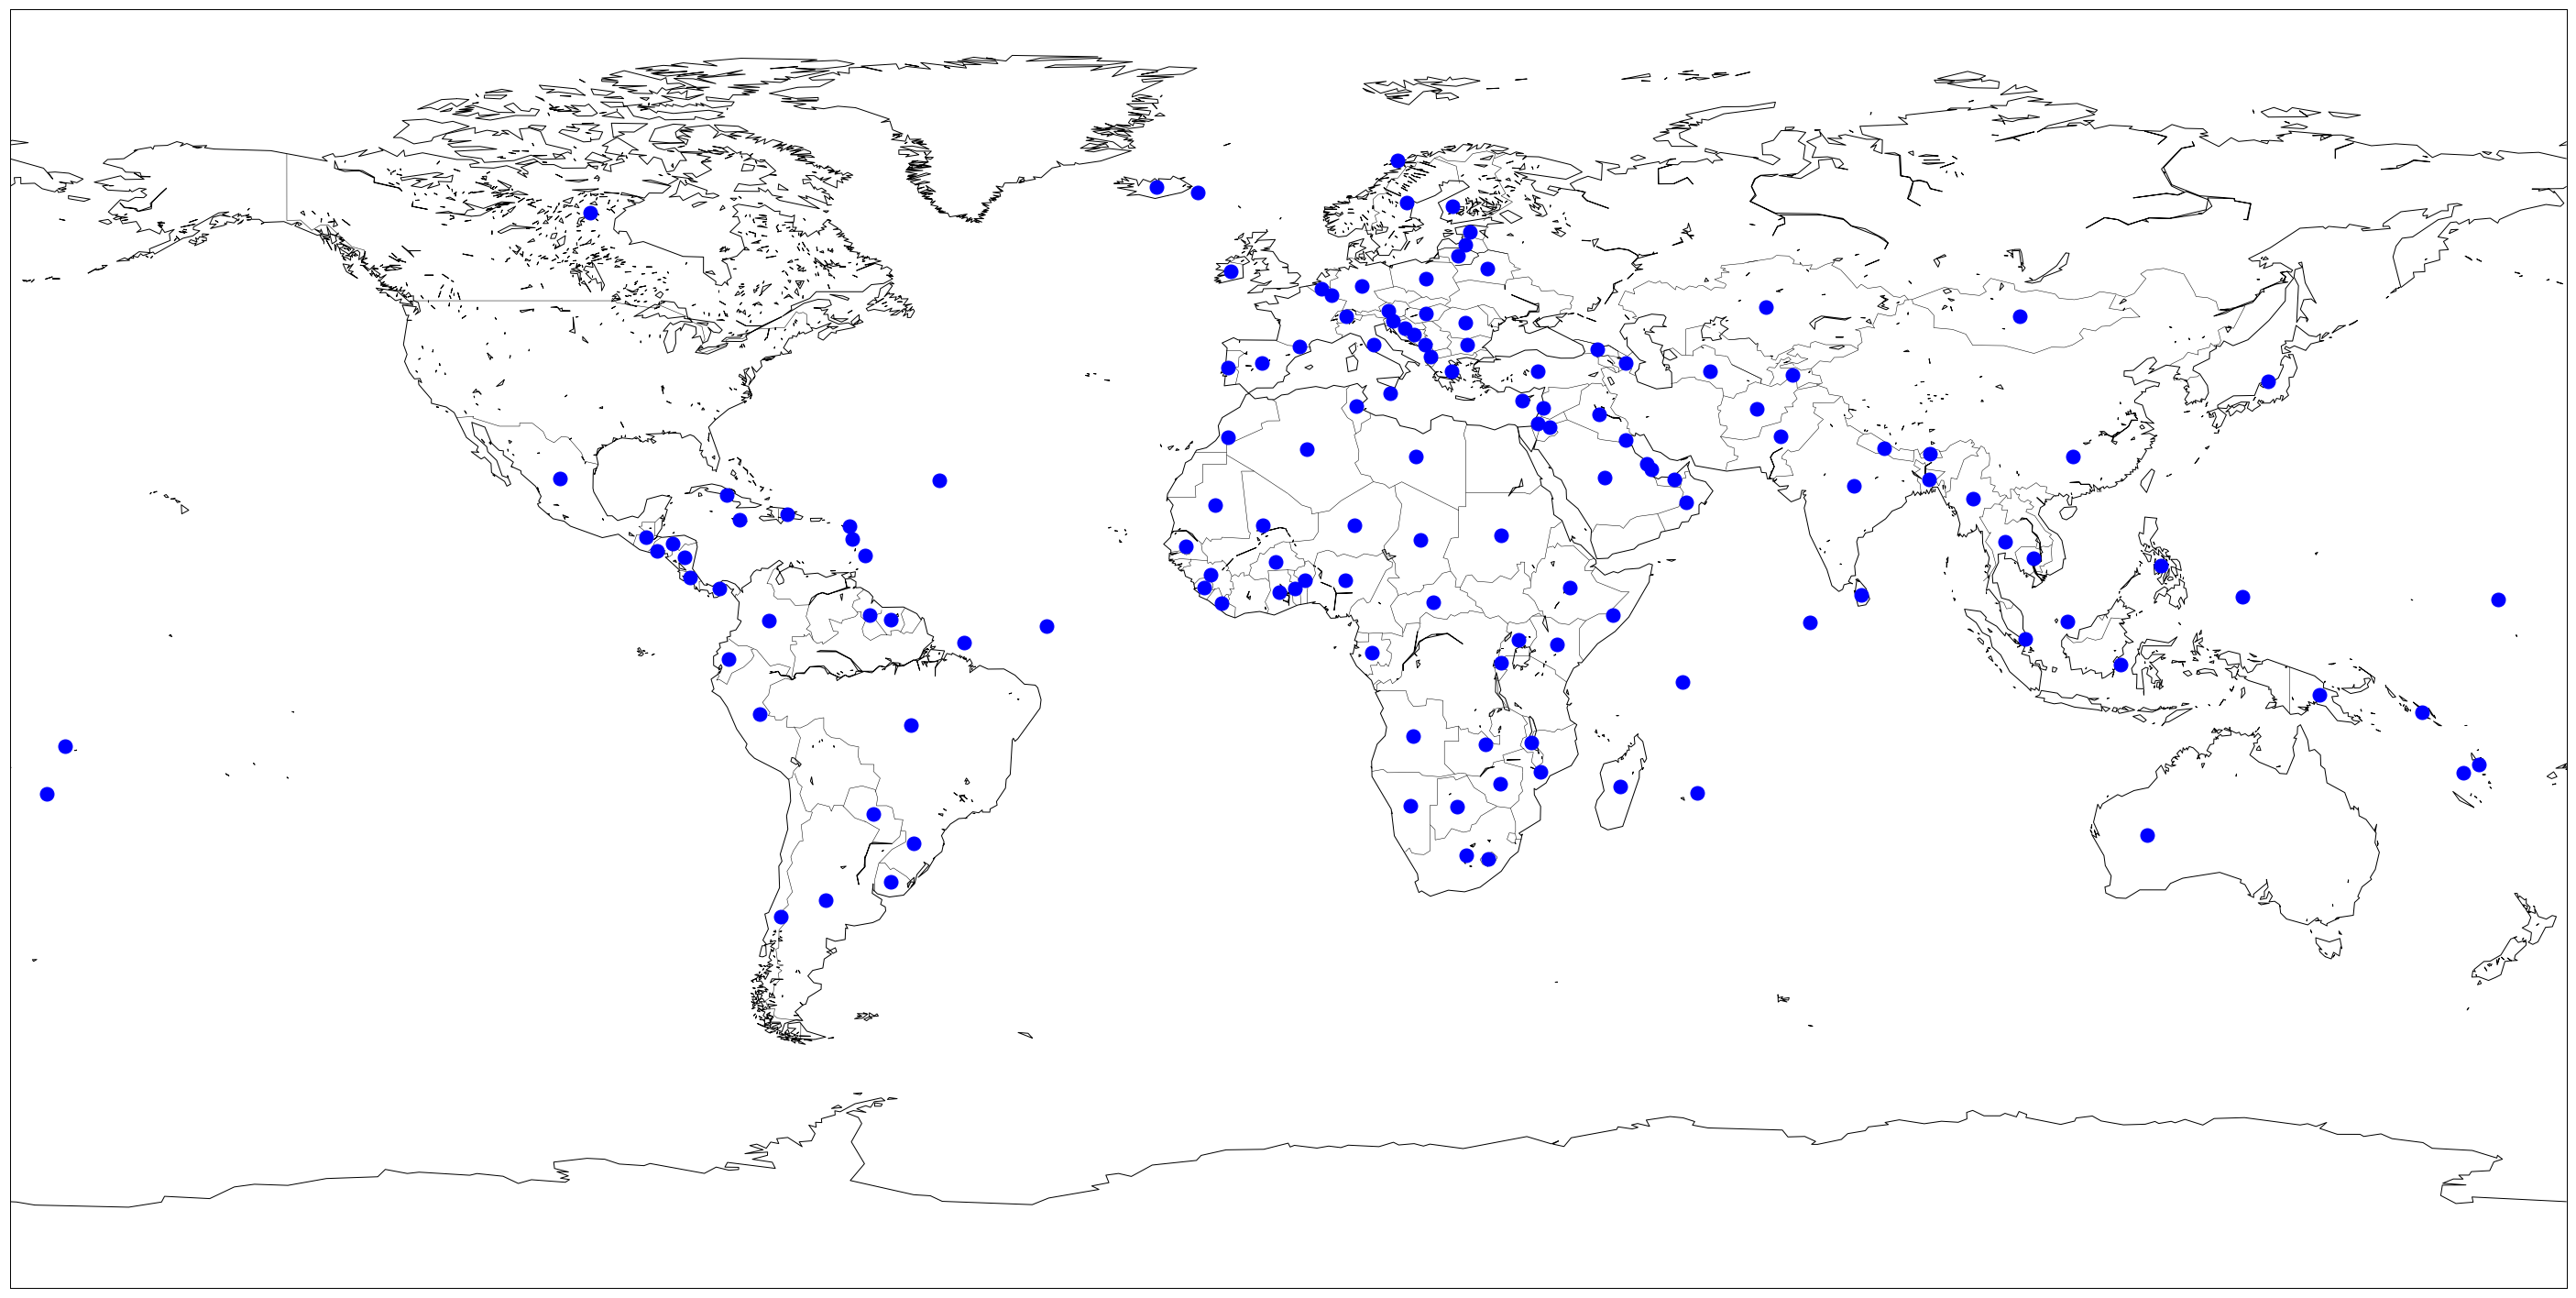

In [105]:
plt.figure(figsize=(50,50))
map = Basemap(projection = 'cyl', lat_0 = 0.0, lon_0 = 0.0,
    resolution = 'c', area_thresh = 1)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'white')
map.drawmapboundary()

longitudes = list(df['Longitude'].values)
latitudes = list(df['Latitude'].values)
x,y = map(longitudes, latitudes)

for i in range(0, len(df)):
    map.plot(x[i], y[i], 'o', markersize=15, color='blue')

### Plotting Regions

Next, the regions of each country will be plotted. In order to do this, a dictionary of regions will have to be created to enable a colour for each plot to be selected.

In [106]:
region_dict = {}

In [107]:
regions_list = df['Region'].cat.categories

In [108]:
for index in range(0, len(regions_list)):
   region_dict[regions_list[index]] = index

In [109]:
region_dict

{'Africa': 0,
 'Americas': 1,
 'Asia': 2,
 'Europe': 3,
 'Oceania': 4,
 'Seven seas (open ocean)': 5}

In [110]:
colours = ['black', 'red', 'orange', 'blue', 'green', 'purple']

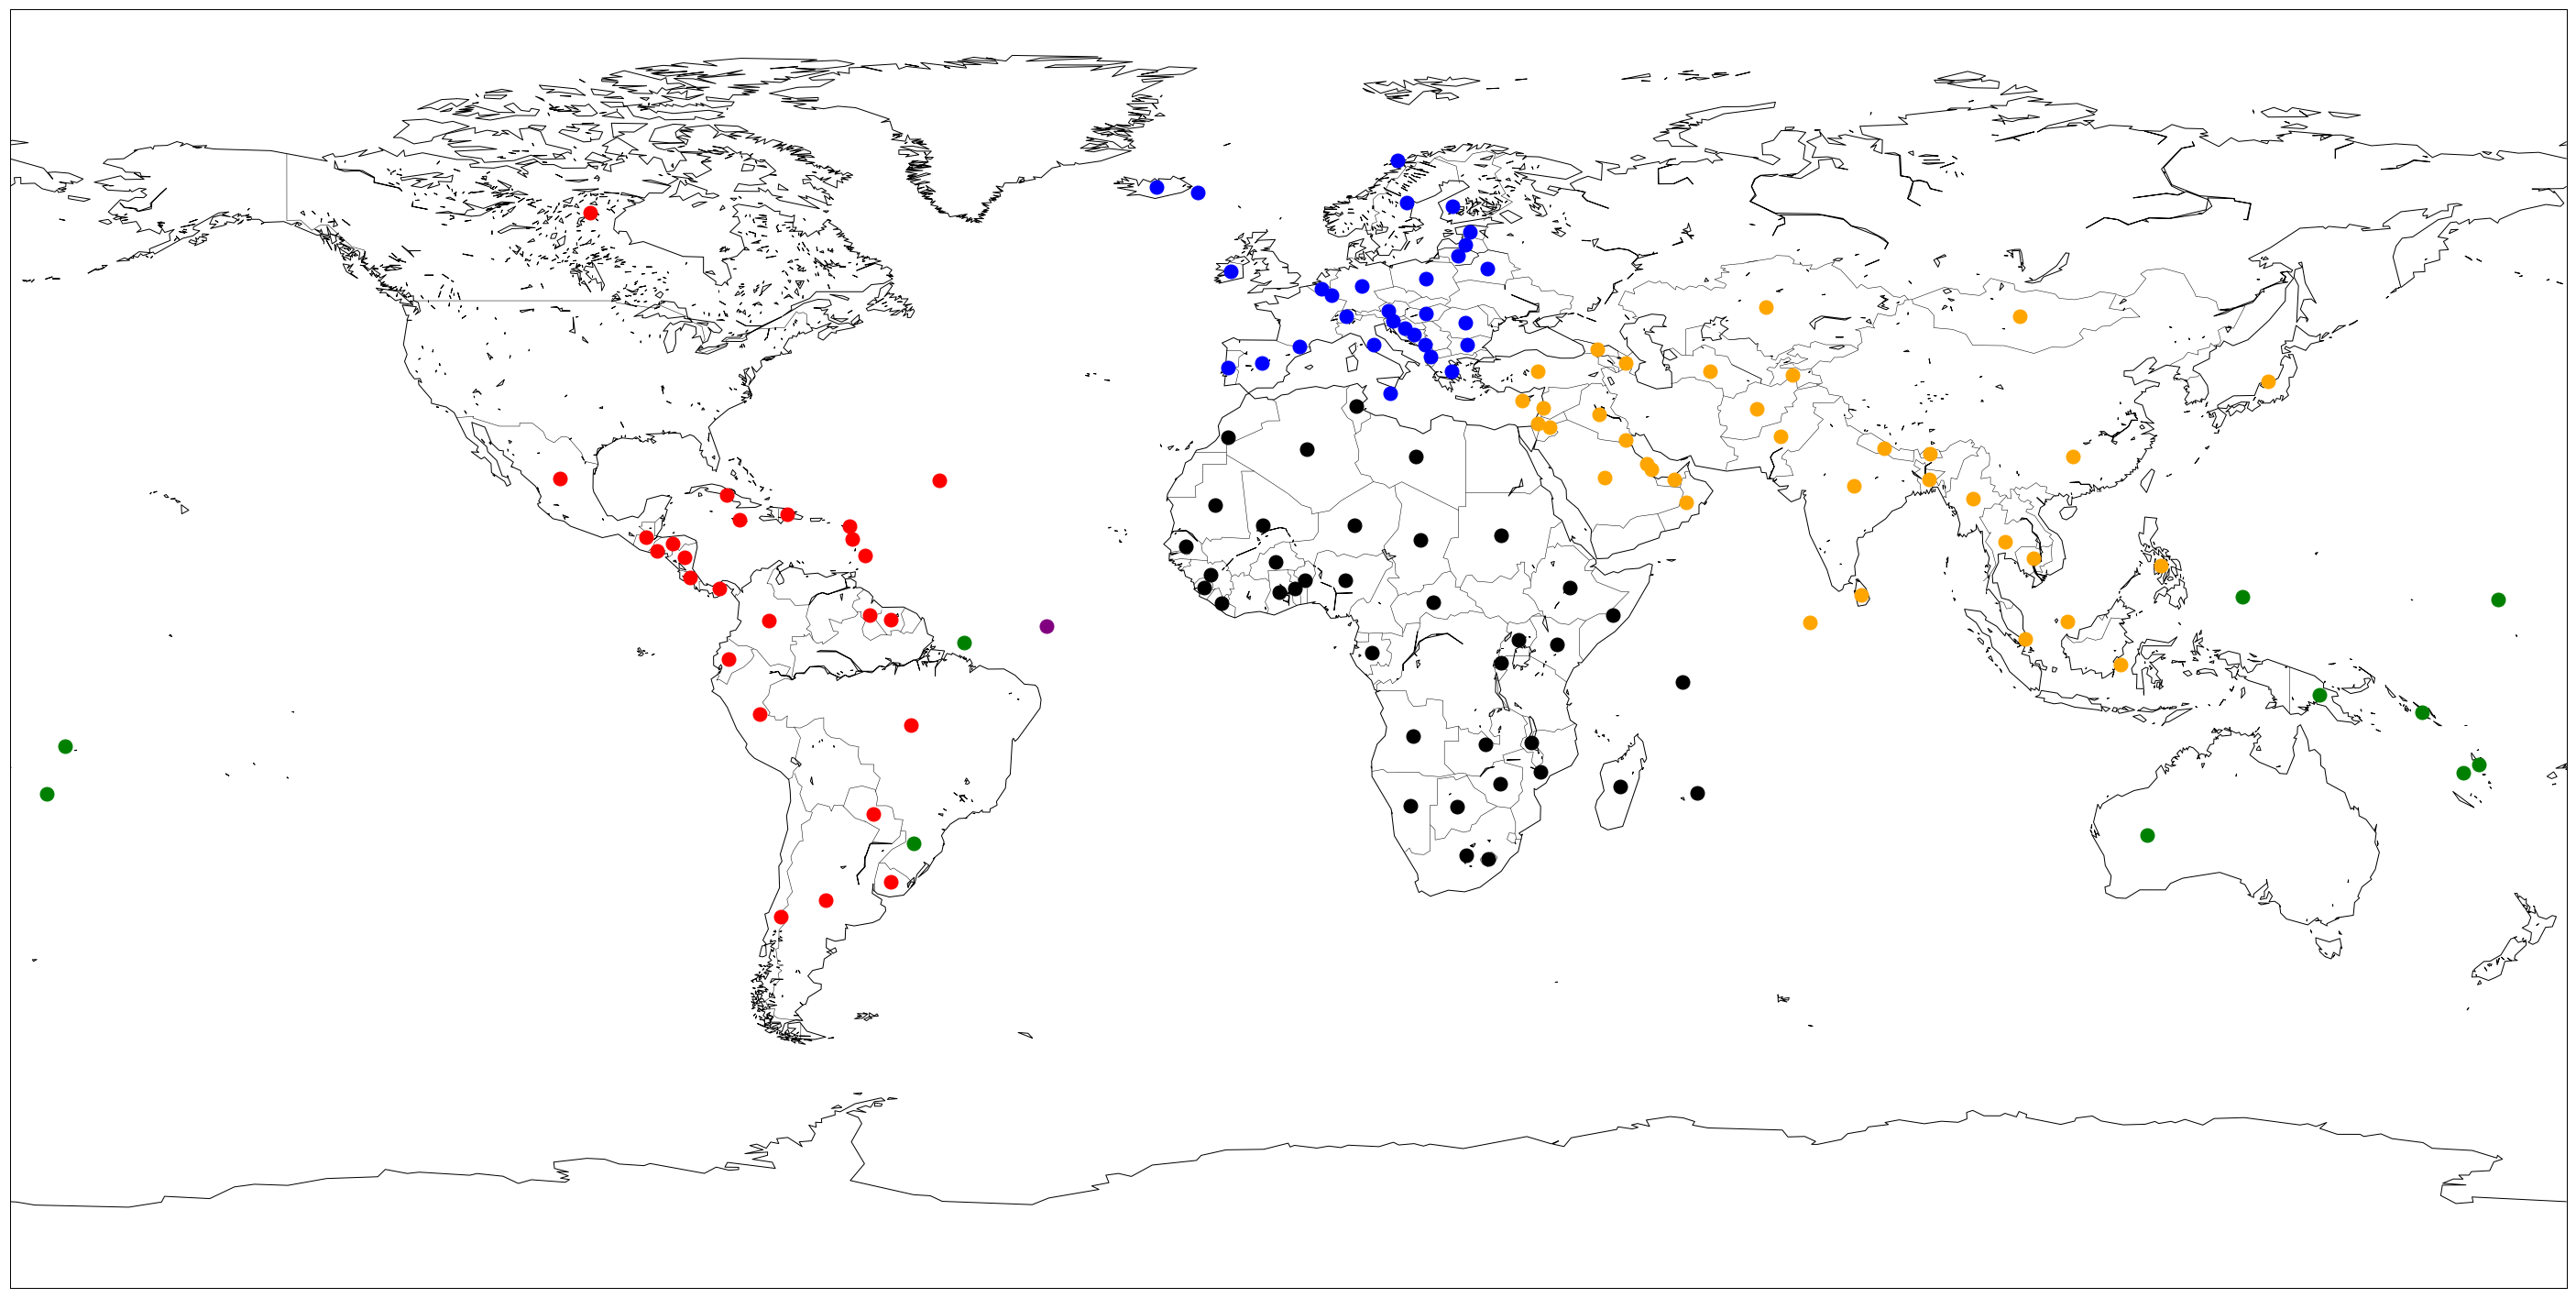

In [111]:
plt.figure(figsize=(50,50))
map = Basemap(projection = 'cyl', lat_0 = 0.0, lon_0 = 0.0,
    resolution = 'c', area_thresh = 1)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'white')
map.drawmapboundary()

longitudes = list(df['Longitude'].values)
latitudes = list(df['Latitude'].values)
x,y = map(longitudes, latitudes)

for i in range(0, len(df)):
    map.plot(x[i], y[i], 'o', markersize=15, color=colours[region_dict[df.iloc[i]['Region']]])

Its clear that some countries have been plotted incorrectly. This is most likely due to the averaging of coordinate values which took place earlier in this notebook. <i>If time allowed, the coordinates of these countries would be verified and update to reflect more accurate values</i>.

### Plotting Categories of Registered Vehicles

The next plot attempts to plot the categories of registered cars for each country in the dataset.

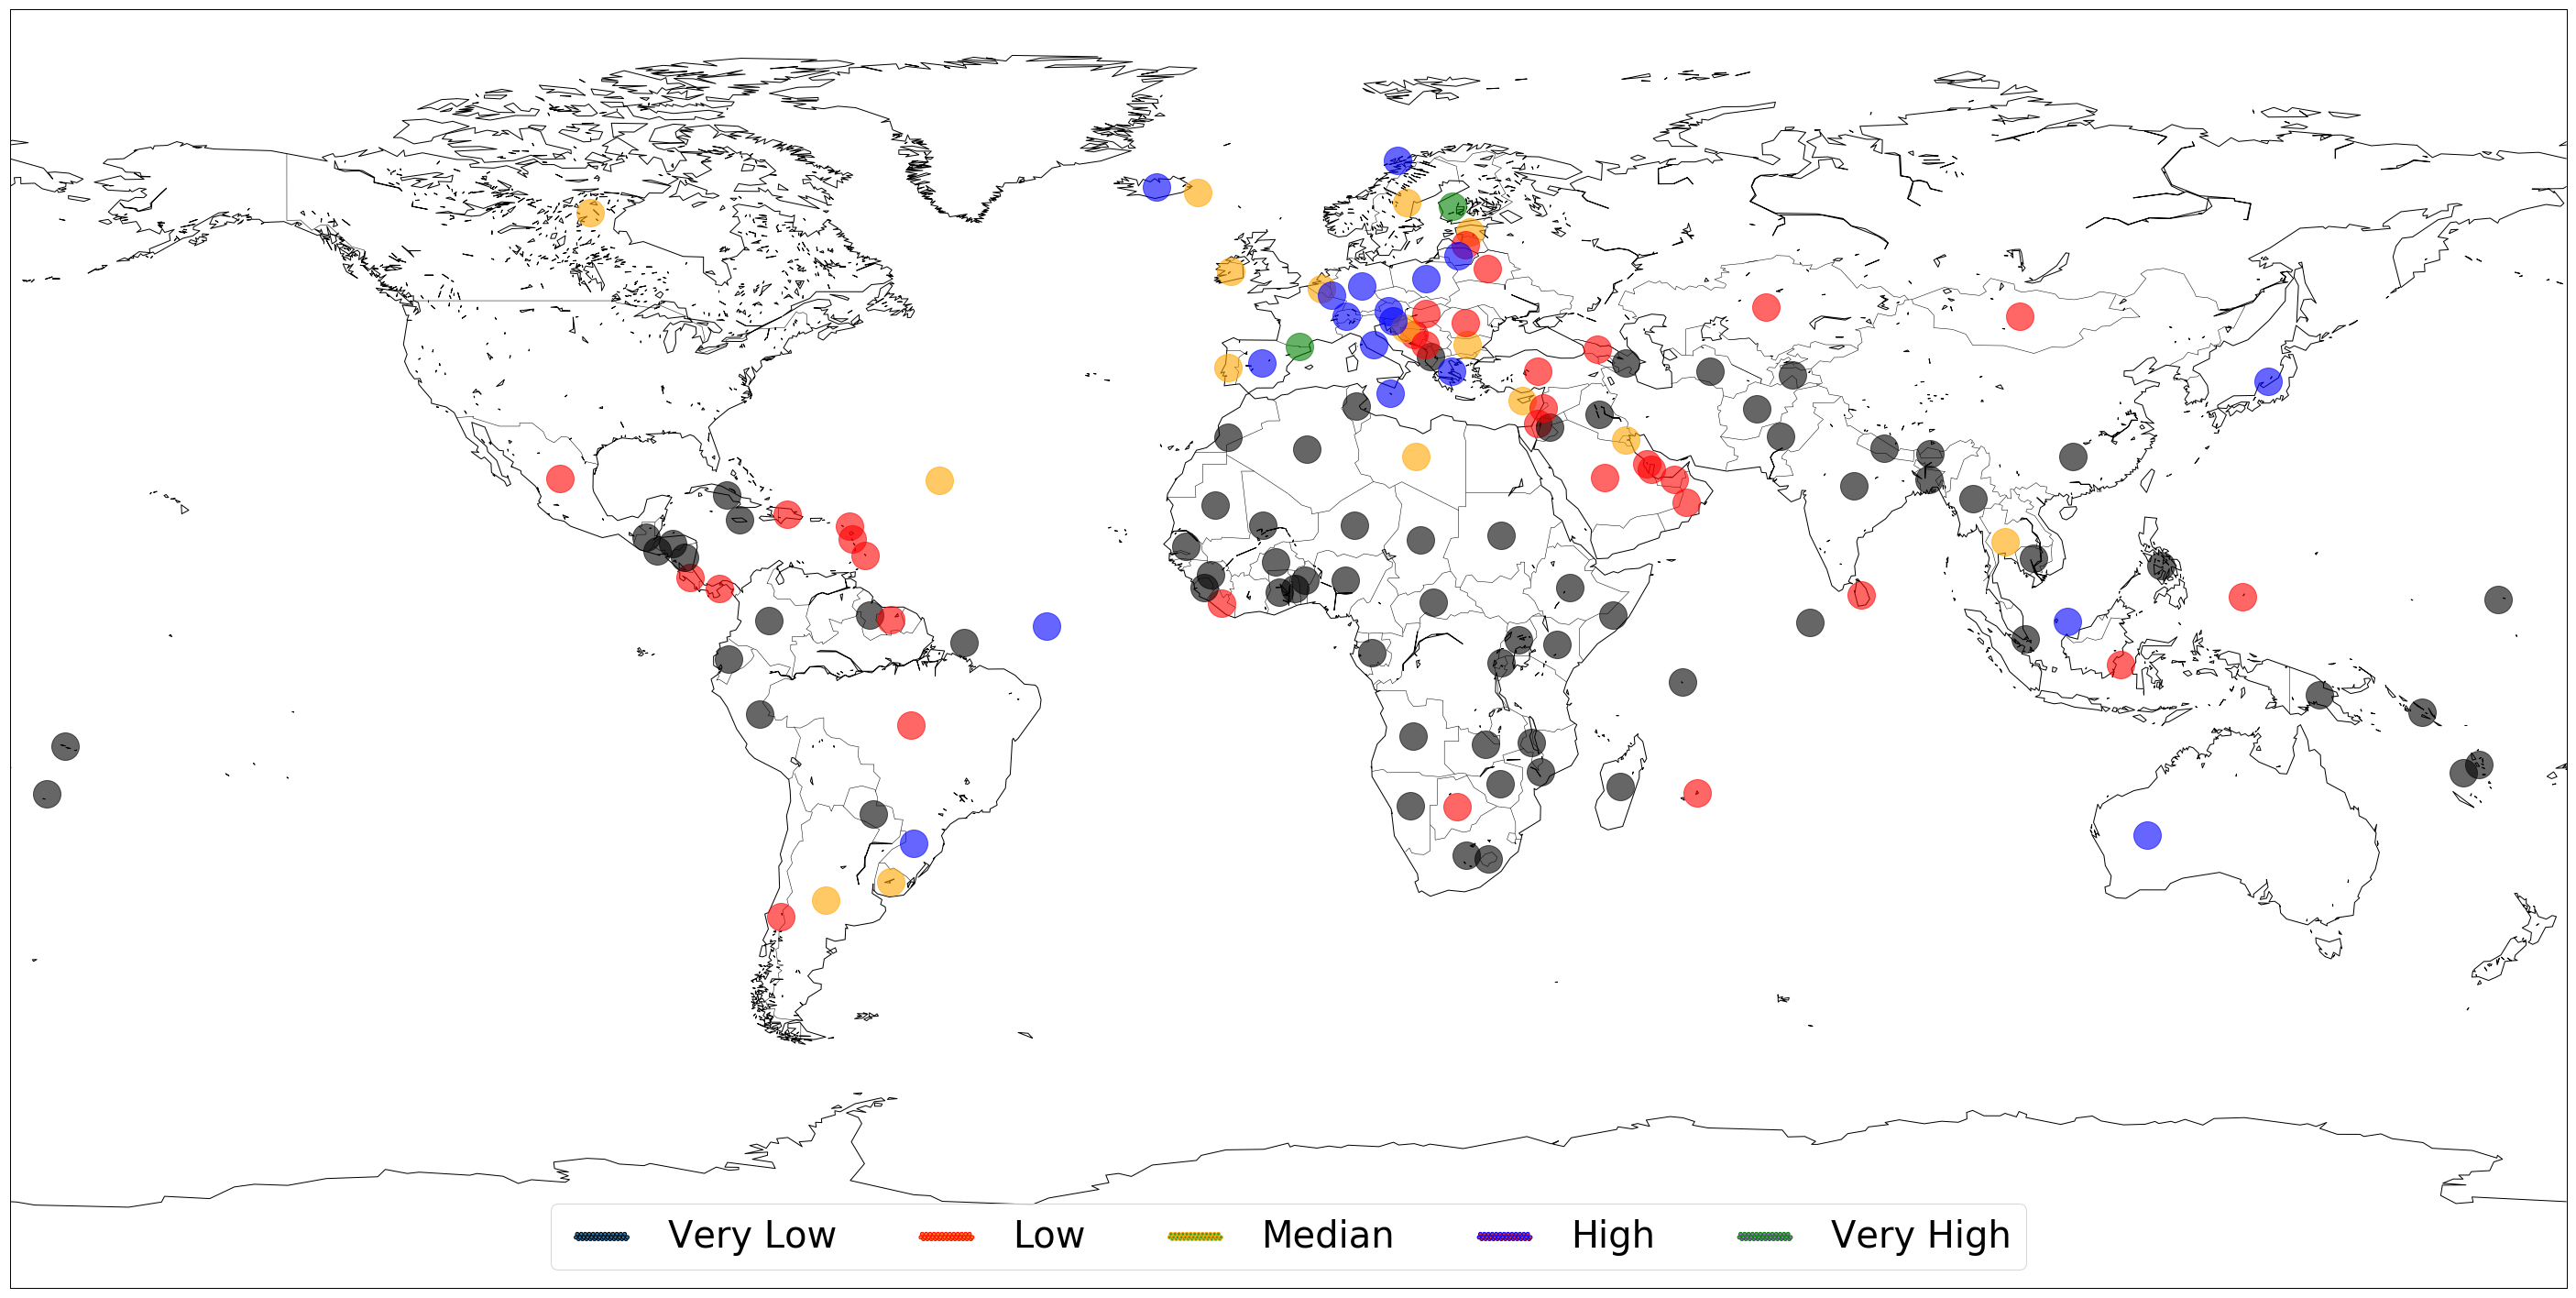

In [112]:
plt.figure(figsize=(50,50))
map = Basemap(projection = 'cyl', lat_0 = 0.0, lon_0 = 0.0,
    resolution = 'c', area_thresh = 1)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'white')
map.drawmapboundary()

longitudes = list(df['Longitude'].values)
latitudes = list(df['Latitude'].values)
x,y = map(longitudes, latitudes)

colours = ['black', 'red', 'orange', 'blue', 'green']

for i in range(0, len(df)):
    map.plot(x[i], y[i], 'o', markersize=30, alpha = 0.6, color=colours[carCat_dict[df.iloc[i]['CarCat']]])

## Build legend 
legendValues = [plt.scatter([],[], s=15, edgecolors=colours[i]) for i in range(0,5)]
leg = plt.legend(legendValues, [key for key in carCat_dict], ncol=5, frameon=True, fontsize=40, 
                 loc = 8, scatterpoints = 40)

The plot suggests that Africa has possibly the lowest ratio of registered vehicles to 100K of population, with Europe having possbily the highest ratio of the same overall.

---

### Plotting Categories of Deaths from Traffic Accidents


The next plot attempts to plot the categories of deaths from traffic accidents per 100K of population for each country in the dataset.

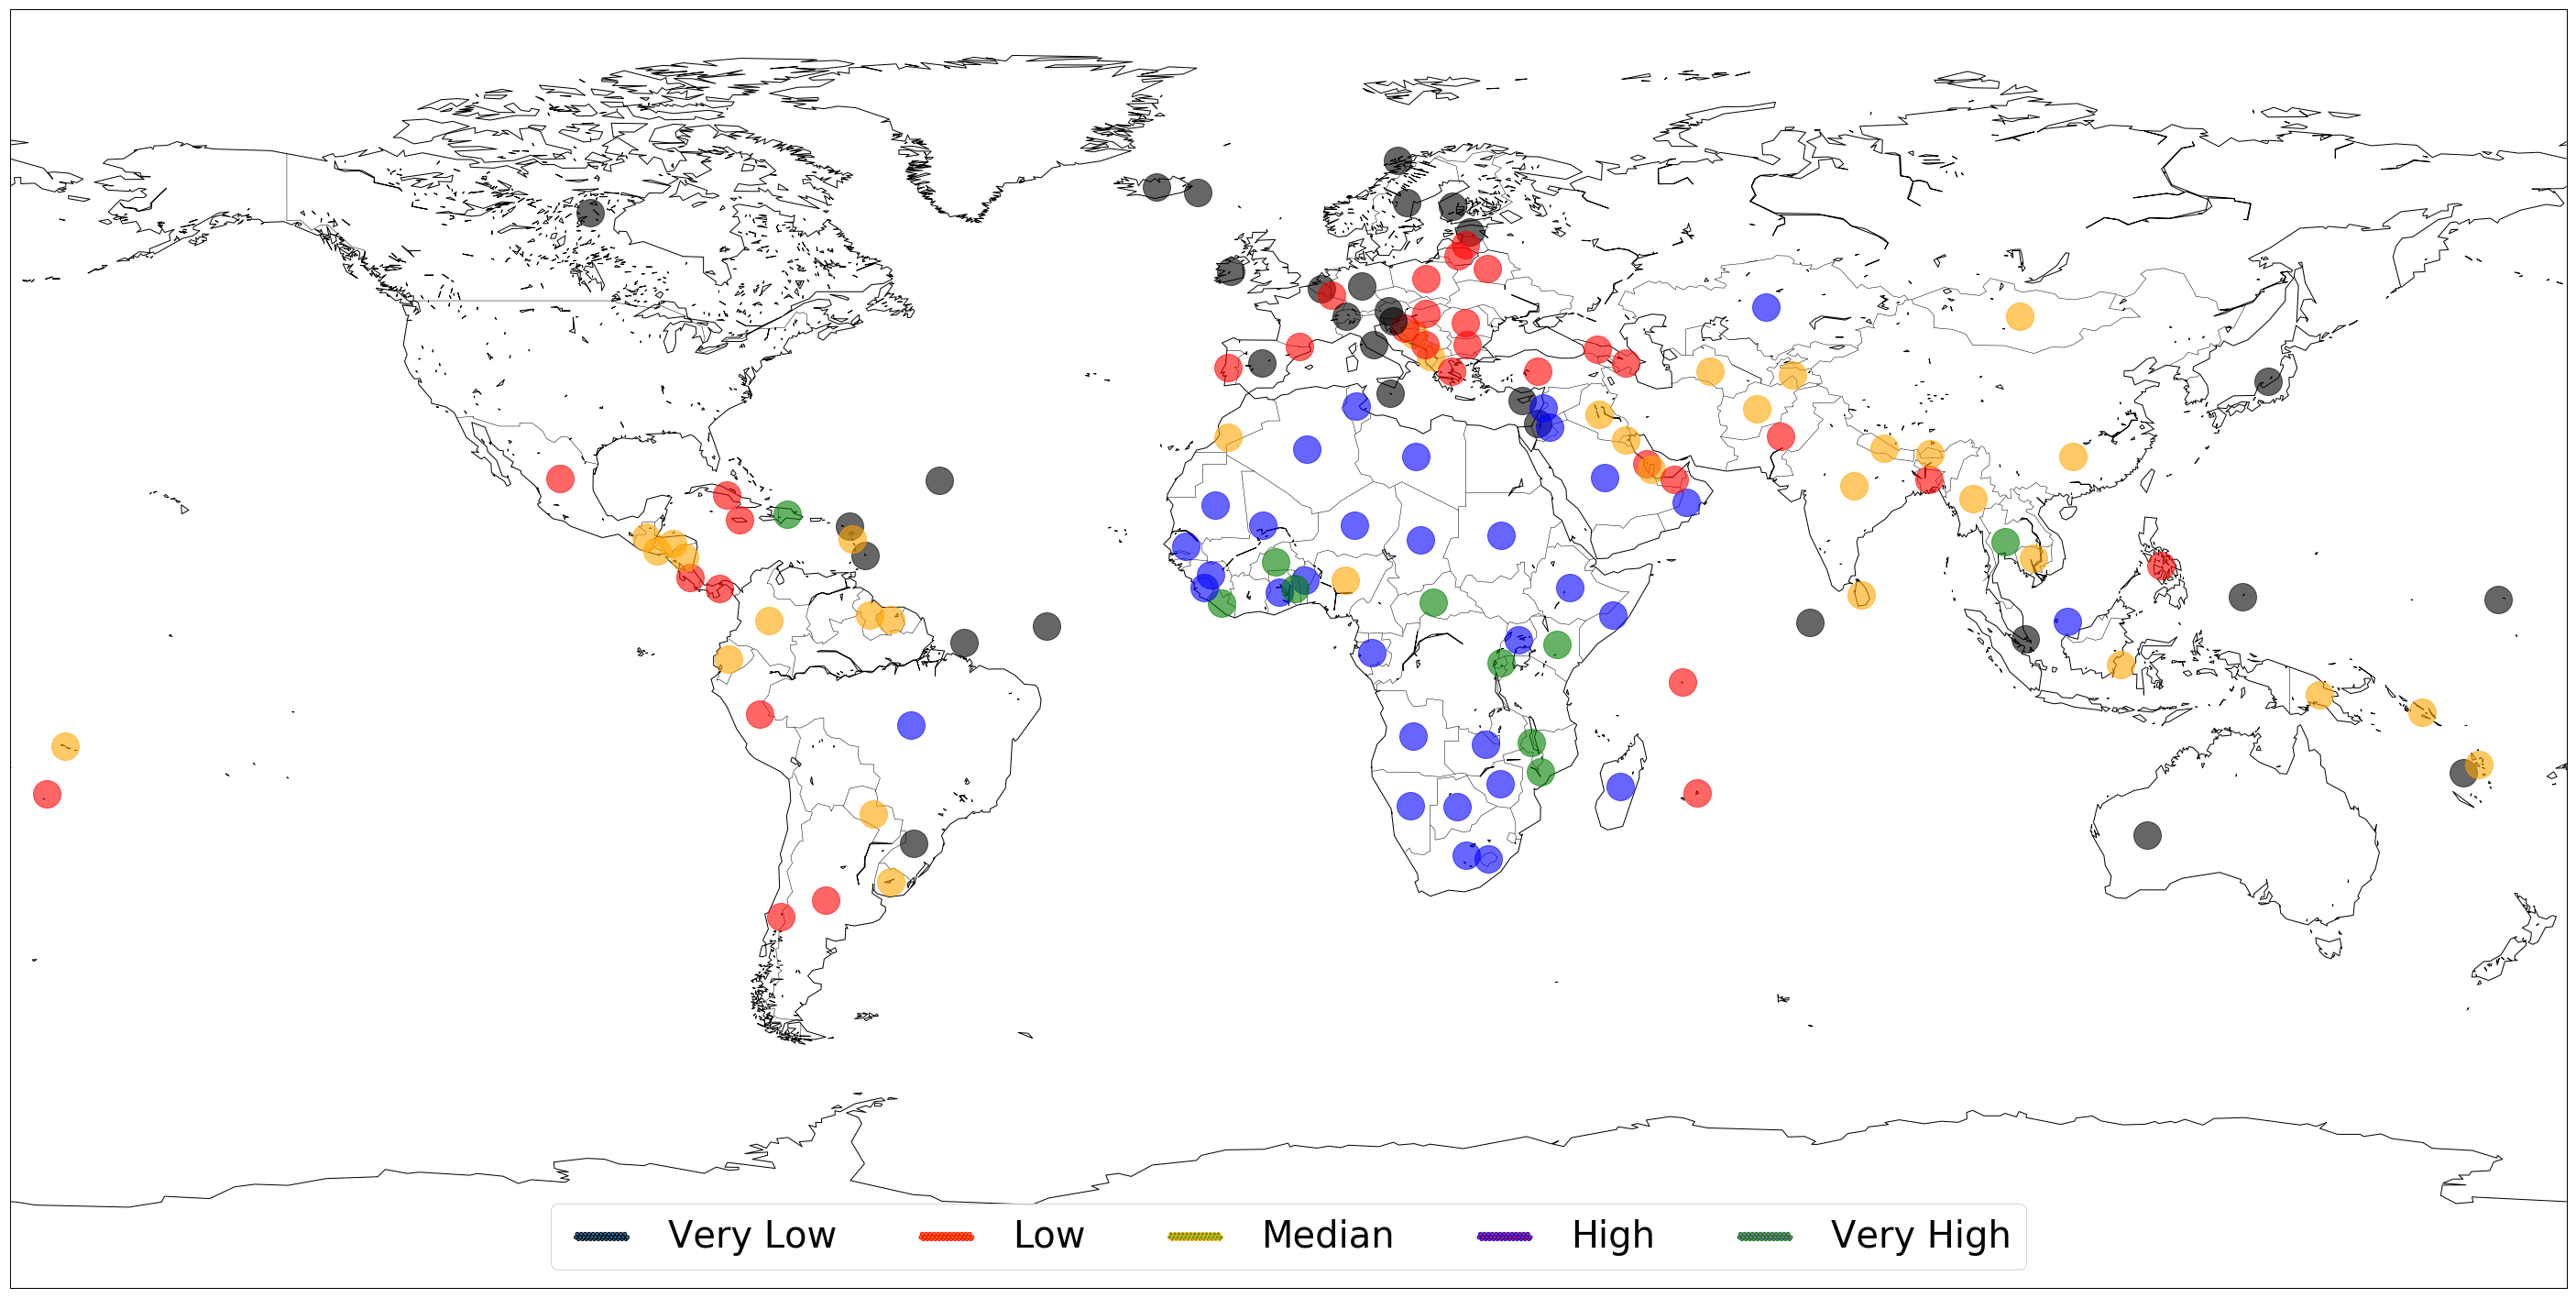

In [113]:
plt.figure(figsize=(50,50))
map = Basemap(projection = 'cyl', lat_0 = 0.0, lon_0 = 0.0,
    resolution = 'c', area_thresh = 1)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'white')
map.drawmapboundary()

longitudes = list(df['Longitude'].values)
latitudes = list(df['Latitude'].values)
x,y = map(longitudes, latitudes)

colours = ['black', 'red', 'orange', 'blue', 'green']

for i in range(0, len(df)):
    map.plot(x[i], y[i], 'o', markersize=30, alpha = 0.6, color=colours[accidentCat_dict[df.iloc[i]['AccidentCat']]])

## Build legend 
legendValues = [plt.scatter([],[], s=15, edgecolors=colours[i]) for i in range(0,5)]
leg = plt.legend(legendValues, [key for key in accidentCat_dict], ncol=5, frameon=True, fontsize=40, 
                 loc = 8, scatterpoints = 40)

Strangely, this plot suggests that the highest ratio of deaths resulting from traffic accidents to 100K of population (blue and green points) seems to occur in Africa, while the lowest ratio appears to occur in Europe (black and red points). 

Even though there appears to be less registered vehicles per head of population in Africa, it still has the highest ratio of deaths resulting from traffic accidents. The opposite appears to be true for Europe.

---

# Location Entropy

Assignement Question:

Write a function for calculating the location entropy of a give dataset.



e = - sumOver_i of [ prob(i) * log2(prob(i)) ]

This is more of an experiment that an actual response. I'm trying to learn this as I go.

In [114]:
def my_first_attempt(df_new, category, feature):
    
    entropyValue = -1 * (df_new.loc[category][feature] * np.log2(df_new.loc[category][feature]))
    return entropyValue
    

In [115]:
df_prob

Prob_Acc  Prob_Car
Very Low   0.223022  0.503597
Low        0.230216  0.237410
Median     0.244604  0.115108
High       0.230216  0.129496
Very High  0.071942  0.014388

In [116]:
print(my_first_attempt(df_prob, 'Very Low', 'Prob_Acc' ))

0.4827848031110475


In [117]:
print(my_first_attempt(df_prob, 'Low', 'Prob_Acc' ))

0.4878137721377859


In [118]:
print(my_first_attempt(df_prob, 'Median', 'Prob_Acc' ))

0.49690834438912024


In [119]:
print(my_first_attempt(df_prob, 'High', 'Prob_Acc' ))

0.4878137721377859


In [120]:
print(my_first_attempt(df_prob, 'Very High', 'Prob_Acc' ))

0.2731664012831759


I know this is incorrect as from what I understand, entropy is a measure of information gained. Higher probabilities should result in lower entropy values, and vice-versa.

---

<b>Second attempt</b>

In [121]:
df_new = df[df['AccidentCat'] == 'Very Low']

In [122]:
df_new

Country   Longitude   Latitude                   Region  \
5    Antigua and Barbuda  -61.794693  17.277500                 Americas   
7              Australia  120.879294 -26.189876                  Oceania   
8                Austria   14.126476  47.585494                   Europe   
12              Barbados  -59.559797  13.181454                 Americas   
14               Belgium    4.640651  50.639816                   Europe   
23                Canada  -98.307770  61.362063                 Americas   
32                Cyprus   33.006002  34.916672                     Asia   
33               Denmark  -12.731619  64.248540                   Europe   
38               Estonia   25.542485  58.671930                   Europe   
40                  Fiji  165.451954 -17.428580                  Oceania   
41               Finland   23.113977  62.356866                   Europe   
42                France  -34.038379   3.240225  Seven seas (open ocean)   
45               Germany   10.385781  51.106982                   Europe   
53               Iceland  -18.573962  64.995754                   Europe   
57               Ireland   -8.137936  53.175449                   Europe   
58                Israel   35.100367  31.688620                     Asia   
59                 Italy   12.070013  42.796626                   Europe   
61                 Japan  138.030896  37.592301                     Asia   
65              Kiribati  -45.611105   0.860015                  Oceania   
77              Maldives   73.457130   3.728709                     Asia   
79                 Malta   14.405233  35.921496                   Europe   
80      Marshall Islands  170.339761   7.003764                  Oceania   
91           Netherlands  -49.182389  23.717001                 Americas   
92           New Zealand  -52.724089 -27.359955                  Oceania   
96                Norway   15.348347  68.750156                   Europe   
99                 Palau  134.408080   7.287428                  Oceania   
115            Singapore  103.817256   1.358761                     Asia   
116             Slovenia   14.804442  46.115548                   Europe   
120                Spain   -3.647550  40.244487                   Europe   
124               Sweden   16.745580  62.779665                   Europe   
125          Switzerland    8.208675  46.797859                   Europe   

         2013POP  DeathsPer100k  TotalCars    CarsPer100k AccidentCat  \
5        97824.0            6.7      29989   30656.076219    Very Low   
7     23145901.0            5.4   17180596   74227.380477    Very Low   
8      8479823.0            5.4    6384971   75296.040967    Very Low   
12      282509.0            6.7     112118   39686.523261    Very Low   
14    11182817.0            6.7    6993767   62540.297315    Very Low   
23    35152370.0            6.0   22366270   63626.634563    Very Low   
32     1143896.0            5.2     644068   56304.768965    Very Low   
33     5614932.0            3.5    2911147   51846.522807    Very Low   
38     1317997.0            7.0     763975   57964.851210    Very Low   
40      879715.0            5.8      86535    9836.708479    Very Low   
41     5438972.0            4.8    5862216  107781.691099    Very Low   
42    65998660.0            5.1   42792103   64837.836102    Very Low   
45    80645605.0            4.3   52391000   64964.482565    Very Low   
53      323764.0            4.6     245949   75965.518093    Very Low   
57     4623816.0            4.1    2482557   53690.652915    Very Low   
58     8059500.0            3.6    2850513   35368.360320    Very Low   
59    60233948.0            6.1   51269218   85116.814857    Very Low   
61   127445000.0            4.7   91377312   71699.409157    Very Low   
65      108535.0            2.9       3452    3180.540839    Very Low   
77      397397.0            3.5      61412   15453.564068    Very Low   
79      425967.0            5.1     322960   75818.

In [123]:
np.sum(df_new['DeathsPer100k'].values)

150.70000000000002

In [124]:
sumOfFeature = np.sum(df_new['DeathsPer100k'].values)

In [125]:
probOfFeature = []

for index in range(0, len(df_new)):
    prob = df_new.iloc[index]['DeathsPer100k'] / sumOfFeature
    probOfFeature.append(prob)

In [126]:
probOfFeature

[0.0444591904445919,
 0.0358327803583278,
 0.0358327803583278,
 0.0444591904445919,
 0.0444591904445919,
 0.039814200398142,
 0.0345056403450564,
 0.0232249502322495,
 0.046449900464499,
 0.0384870603848706,
 0.0318513603185136,
 0.033842070338420696,
 0.028533510285335097,
 0.030524220305242197,
 0.0272063702720637,
 0.0238885202388852,
 0.040477770404777694,
 0.031187790311877902,
 0.0192435301924353,
 0.0232249502322495,
 0.033842070338420696,
 0.0378234903782349,
 0.022561380225613797,
 0.039814200398142,
 0.0252156602521566,
 0.0318513603185136,
 0.0238885202388852,
 0.042468480424684804,
 0.0245520902455209,
 0.018579960185799597,
 0.0218978102189781]

In [127]:
## Sum should be 1
np.sum(probOfFeature)

0.9999999999999998

In [128]:
log2Feature = [np.log2(x) for x in probOfFeature]

In [129]:
## Should all be negative
log2Feature

[-4.491374511140052,
 -4.802576199434355,
 -4.802576199434355,
 -4.491374511140052,
 -4.491374511140052,
 -4.650573105989306,
 -4.857023983456732,
 -5.428180684652858,
 -4.428180684652858,
 -4.699482706470252,
 -4.972501200876668,
 -4.8850383596263285,
 -5.131198946895727,
 -5.0339017455408115,
 -5.199911696979741,
 -5.3875387001555115,
 -4.626726364034938,
 -5.002874849920187,
 -5.699482706470252,
 -5.428180684652858,
 -4.8850383596263285,
 -4.724573687433082,
 -5.470000860347485,
 -4.650573105989306,
 -5.3095361881542384,
 -4.972501200876668,
 -5.3875387001555115,
 -4.557463701597824,
 -5.348010335968874,
 -5.75010877954022,
 -5.51306958223937]

In [130]:
productOfValues = [(probOfFeature[i] * log2Feature[i]) for i in range(0, len(probOfFeature))]

In [131]:
## Now sum over the product but as log2 is negative, the products need to be multiplied by -1

sumOfProducts = -1 * np.sum(productOfValues)
sumOfProducts

4.907571319527219

I will now try to turn the above into a function and then assess if the logic is correct.

In [132]:
def my_second_attempt(dataframe, catFeature, category, feature):
        df_new = dataframe[dataframe[catFeature] == category]
        
        sumOfFeature = np.sum(df_new[feature].values)
        
        probOfFeature = []

        for index in range(0, len(df_new)):
            prob = df_new.iloc[index][feature] / sumOfFeature
            probOfFeature.append(prob)
        
        log2Feature = [np.log2(x) for x in probOfFeature]
        
        productOfValues = [(probOfFeature[i] * log2Feature[i]) for i in range(0, len(probOfFeature))]
        
        sumOfProducts = -1 * np.sum(productOfValues)
        
        return sumOfProducts
        
    

In [133]:
my_second_attempt(df, 'AccidentCat', 'Very Low', 'DeathsPer100k')

4.907571319527219

In [134]:
my_second_attempt(df, 'AccidentCat', 'Low', 'DeathsPer100k')

4.969362978868325

In [135]:
my_second_attempt(df, 'AccidentCat', 'Median', 'DeathsPer100k')

5.078928427056747

In [136]:
my_second_attempt(df, 'AccidentCat', 'High', 'DeathsPer100k')

4.996877184702409

In [137]:
my_second_attempt(df, 'AccidentCat', 'Very High', 'DeathsPer100k')

3.3184201254249883

While I think that the logic here is correct, I may be calculating the values on the wrong slice of the dataframe. The assumption is that lower probabilities result in higher entropy values. This was not the case in the calculation above.

---

<b>Third attempt</b>

For this next attempt, I am going to group observations by their Region. I am going to ignore all data related to vehicles and accidents. I am only going to try and calculate the entropy based on the populations of the countries in each Regions.

In [138]:
df.groupby('Region').sum()['2013POP']

Region
Africa                     8.390085e+08
Americas                   6.116423e+08
Asia                       3.933400e+09
Europe                     3.727790e+08
Oceania                    3.735557e+07
Seven seas (open ocean)    6.599866e+07
Name: 2013POP, dtype: float64

In [139]:
## Remove Exponent values
pd.set_option('display.precision',10)

## Total populations of each region
df.groupby('Region').sum()['2013POP']

Region
Africa                      839008537.0
Americas                    611642309.0
Asia                       3933400057.0
Europe                      372779047.0
Oceania                      37355569.0
Seven seas (open ocean)      65998660.0
Name: 2013POP, dtype: float64

In [140]:
# Total number of countries in each region
df.groupby('Region').count()['Country']

Region
Africa                     37
Americas                   25
Asia                       35
Europe                     30
Oceania                    11
Seven seas (open ocean)     1
Name: Country, dtype: int64

In [141]:
region_df = df[df['Region'] == 'Africa']

In [142]:
totalPopulation = region_df['2013POP'].sum()

In [143]:
totalPopulation

839008537.0

In [144]:
sumOfValues = 0

In [145]:
for index in range(0, len(region_df)):
    probability = region_df.iloc[index]['2013POP'] / totalPopulation
    sumOfValues += -1 * probability * np.log2(probability)
print(sumOfValues)

4.3686957446942145


The above will now be combined into a function and the entropies for each region will then be calculated.

In [146]:
def my_third_attempt(dataframe, region):
    df_new = dataframe[dataframe['Region'] == region]
    totalPopulation = df_new['2013POP'].sum()  
    sumOfValues = 0
    
    for index in range(0, len(df_new)):
        probability = df_new.iloc[index]['2013POP'] / totalPopulation
        sumOfValues += -1 * probability * np.log2(probability)
    return sumOfValues
    
    

In [147]:
my_third_attempt(df, 'Africa')

4.3686957446942145

In [148]:
my_third_attempt(df, 'Europe')

3.8044132881274453

In [149]:
my_third_attempt(df, 'Asia')

2.8538279872171963

In [150]:
my_third_attempt(df, 'Oceania')

1.6345374021396597

In [151]:
my_third_attempt(df, 'Seven seas (open ocean)')

0.0

The lowest information gain is from the Seven seas (open ocean) Region and this makes sense. There is only one country in this region so therefore the probabilty that the country is in this region is one, resulting in no information gained, or zero entropy.

The highest entropy found is for the Africa region. This suggests that there is the greatest levels of disorder in the distribution of populations in this region, resulting in a higher entropy value.

----


# Final Remarks

Firstly, I'd like to thank you for reading this far and more importantly, for giving me the opportunity to respond to this assignment. As you might have guessed, I'm not very confident of the work I have produced in the <b>Location Entropy</b> section of this notebook as its an area which I haven't explored before. I thought that it seemed more straightforward that it actually was, so I perhaps wasted too much time on the other parts of the notebook. I just wanted to give you a flavour of my proficiencies levels in the hope that it might encourage you to continue conversations with me.

I currently might not have the full skill set which your company requires but I can assure you that I am in the process of developing them. I thoroughly enjoyed working through this notebook and while it might not be at a professional standard, I hope it highlights my desire to work in this area. 

Thank you for giving me the opportunity to submit this, I hope to hear from you soon.

Kind Regards,

Sean Casey